## Python dependencies

In [40]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data loading & cleaning 

In [97]:
df_1 = pd.read_csv("raw_data/connectivity1458292421ttyUSB0.csv",
                  names=["type", "MAC", "seq", "wraps", "timestamp", "RSSI", "LQI"],)
df_2 = pd.read_csv("raw_data/connectivity1459473036ttyUSB0.csv",
                  names=["type", "MAC", "seq", "wraps", "timestamp", "RSSI", "LQI"],)

# We apply the same cleaning on all data sets
for num, d in enumerate([df_1, df_2]):
    d["type"] = d["type"].map({"0xaa": "rPi", "0x55": "mote"})
    # It's better to have a Not a Number (NaN) rather than 0 to avoid confusion.
    d["timestamp"] = d["timestamp"].replace({0: np.nan})
    # Timestamp are only delta. No date sync is available.
    d['timestamp'] = d["timestamp"] - d["timestamp"].min()
    d["origin"] = num

df = pd.concat([df_1, df_2])

## Motes in action

We can see all the motes in actions:

In [88]:
df_1[df_1["type"] == "mote"].MAC.unique()

array(['0x0:0x12:0x4b:0x0:0x6:0x15:0xa4:0xd1'], dtype=object)

In [28]:
df_2[df_2["type"] == "mote"].MAC.unique()

array(['0x0:0x12:0x4b:0x0:0x6:0xd:0x84:0x64'], dtype=object)

## RaspberryPi in action

In [35]:
df_1[df_1["type"] == "rPi"].MAC.unique()

array(['0x0:0x12:0x4b:0x0:0x6:0xd:0x80:0x1a',
       '0x0:0x12:0x4b:0x0:0x6:0xd:0x9f:0x43'], dtype=object)

In [36]:
df_2[df_2["type"] == "rPi"].MAC.unique()

array(['0x0:0x12:0x4b:0x0:0x6:0xd:0x80:0x1a',
       '0x0:0x12:0x4b:0x0:0x6:0xd:0x9f:0x43'], dtype=object)

## RSSI summary

In [67]:
df.RSSI.describe()

count    343002.000000
mean        -34.238876
std           3.266245
min         -61.000000
25%         -37.000000
50%         -33.000000
75%         -31.000000
max         -28.000000
Name: RSSI, dtype: float64

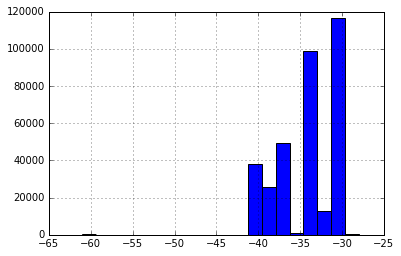

In [74]:
df.RSSI.hist(bins=20)

## LQI summary

In [68]:
df.LQI.describe()

count    343002.000000
mean        107.926432
std           0.330771
min          66.000000
25%         108.000000
50%         108.000000
75%         108.000000
max         108.000000
Name: LQI, dtype: float64

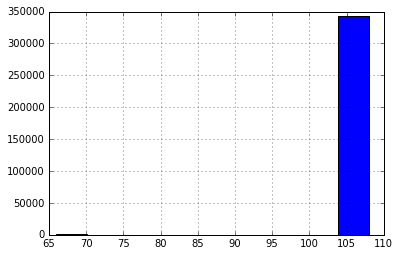

In [76]:
df.LQI.hist()

## Which data origin is the first in time?

In [93]:
df_1.timestamp.describe()

/usr/lib/python3/dist-packages/numpy/lib/function_base.py:3823: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


count    57054.000000
mean     28509.884092
std      16460.871517
min          0.000000
25%               NaN
50%               NaN
75%               NaN
max      57020.000000
Name: timestamp, dtype: float64

In [94]:
df_2.timestamp.describe()

/usr/lib/python3/dist-packages/numpy/lib/function_base.py:3823: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


count    57054.000000
mean     28509.884092
std      16460.871517
min          0.000000
25%               NaN
50%               NaN
75%               NaN
max      57020.000000
Name: timestamp, dtype: float64

In [96]:
df[df["type"] == "mote"].set_index("timestamp").sort()

-c:1: FutureWarning: sort(....) is deprecated, use sort_index(.....)


,type,MAC,seq,wraps,RSSI,LQI,origin
timestamp,,,,,,,
0.0,mote,0x0:0x12:0x4b:0x0:0x6:0x15:0xa4:0xd1,9934,0,-39,108,0
0.0,mote,0x0:0x12:0x4b:0x0:0x6:0xd:0x84:0x64,1473,0,-42,108,1
1.0,mote,0x0:0x12:0x4b:0x0:0x6:0x15:0xa4:0xd1,9935,0,-39,108,0
1.0,mote,0x0:0x12:0x4b:0x0:0x6:0xd:0x84:0x64,1474,0,-42,108,1
2.0,mote,0x0:0x12:0x4b:0x0:0x6:0x15:0xa4:0xd1,9936,0,-39,108,0
2.0,mote,0x0:0x12:0x4b:0x0:0x6:0xd:0x84:0x64,1475,0,-42,108,1
3.0,mote,0x0:0x12:0x4b:0x0:0x6:0x15:0xa4:0xd1,9937,0,-39,108,0
3.0,mote,0x0:0x12:0x4b:0x0:0x6:0xd:0x84:0x64,1476,0,-42,108,1
4.0,mote,0x0:0x12:0x4b:0x0:0x6:0xd:0x84:0x64,1477,0,-42,108,1


In [98]:
df_1

,type,MAC,seq,wraps,timestamp,RSSI,LQI,origin
0,rPi,0x0:0x12:0x4b:0x0:0x6:0xd:0x80:0x1a,10039,0,NaN,-39,108,0
1,rPi,0x0:0x12:0x4b:0x0:0x6:0xd:0x9f:0x43,10040,0,NaN,-31,108,0
2,mote,0x0:0x12:0x4b:0x0:0x6:0x15:0xa4:0xd1,9934,0,0.0,-39,108,0
3,rPi,0x0:0x12:0x4b:0x0:0x6:0xd:0x80:0x1a,10040,0,NaN,-39,107,0
4,rPi,0x0:0x12:0x4b:0x0:0x6:0xd:0x9f:0x43,10041,0,NaN,-31,108,0
5,mote,0x0:0x12:0x4b:0x0:0x6:0x15:0xa4:0xd1,9935,0,1.0,-39,108,0
6,rPi,0x0:0x12:0x4b:0x0:0x6:0xd:0x80:0x1a,10041,0,NaN,-38,108,0
7,rPi,0x0:0x12:0x4b:0x0:0x6:0xd:0x9f:0x43,10042,0,NaN,-31,108,0
8,mote,0x0:0x12:0x4b:0x0:0x6:0x15:0xa4:0xd1,9936,0,2.0,-39,108,0
9,rPi,0x0:0x12:0x4b:0x0:0x6:0xd:0x80:0x1a,10042,0,NaN,-39,108,0
